# The Metropolitan Museum of Art Data Analysis and Visualization

### Analyze and Visualize Artists and Artworks Metadata  

- Kaggle data: https://www.kaggle.com/metmuseum/the-metropolitan-museum-of-art-open-access  
- Total number of artists: 56,390  
- Total number of artworks: 448,203

#### Analysis Point

- Artists
    - Top 3 nationality?
    - Date of birth histogram?
    - Top artists with the most artworks?
    
- Artworks
    - Which media have the top collection?
    - Which classifications have the top collection?
    - Which departments have the top collection?

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Chart utils

In [2]:
def plot_pie_chart(values, labels, title):
    fig1, ax1 = plt.subplots()
    ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.title(title, size=14, pad=15)

    plt.show()

In [3]:
def plot_bar_chart(df, column, figsize=(10,5), title=None):
    counts = df[column].value_counts()[:10]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values, counts.index)
    plt.xlabel('Number of artworks', size=14, labelpad=15)
    plt.xticks(rotation=0)
    plt.ylabel(column, size=14)
    plt.title(title, size=14, pad=15)
    plt.show()

## 3. Create Dataframe

In [4]:
met_art = pd.read_csv('./MetObjects.csv')

/Users/jungwon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
met_art.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


In [6]:
met_art.shape

(448203, 43)

In [7]:
met_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448203 entries, 0 to 448202
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            448203 non-null  object
 1   Is Highlight             448203 non-null  bool  
 2   Is Public Domain         448203 non-null  bool  
 3   Object ID                448203 non-null  int64 
 4   Department               448203 non-null  object
 5   Object Name              445568 non-null  object
 6   Title                    416906 non-null  object
 7   Culture                  186518 non-null  object
 8   Period                   71882 non-null   object
 9   Dynasty                  23018 non-null   object
 10  Reign                    10817 non-null   object
 11  Portfolio                20370 non-null   object
 12  Artist Role              259909 non-null  object
 13  Artist Prefix            88928 non-null   object
 14  Artist Display Name 

## 4. Missing Values

결측값이 많지만, ML 모델을 학습시키는데 메타데이터를 사용하지 않기 때문에 괜찮다

In [11]:
# 결측값이 없는 컬럼만 추출
no_nulls = set(met_art.columns[met_art.isnull().mean()==0])
# 결측값이 0인 컬럼의 갯수
len(no_nulls)

10

42개 중 23개 컬럼이 50% 이상의 결측값을 갖는다

In [12]:
missing_cols = set(met_art.columns[met_art.isnull().mean() > 0.50])
print(len(missing_cols))
print(missing_cols)

23
{'Artist Begin Date', 'River', 'Country', 'Artist Nationality', 'Subregion', 'Culture', 'City', 'Period', 'Locus', 'Artist End Date', 'Artist Prefix', 'County', 'Locale', 'Excavation', 'Reign', 'Region', 'Portfolio', 'Artist Display Bio', 'State', 'Dynasty', 'Geography Type', 'Artist Suffix', 'Rights and Reproduction'}


42개 중 18개 컬럼이 75% 이상의 결측값을 갖는다

In [13]:
missing_cols = set(met_art.columns[met_art.isnull().mean() > 0.75])
print(len(missing_cols))
print(missing_cols)

18
{'Country', 'Region', 'City', 'Artist Prefix', 'Portfolio', 'Excavation', 'County', 'Rights and Reproduction', 'River', 'State', 'Locus', 'Locale', 'Dynasty', 'Period', 'Subregion', 'Geography Type', 'Artist Suffix', 'Reign'}


결측값이 75%를 넘는 컬럼의 목록

In [14]:
# See the list of columns with mostly (>75%) missing values
for col in missing_cols:
    print(col)

Country
Region
City
Artist Prefix
Portfolio
Excavation
County
Rights and Reproduction
River
State
Locus
Locale
Dynasty
Period
Subregion
Geography Type
Artist Suffix
Reign


결측값이 많은 순서대로 컬럼과 결측값 수 정렬

In [15]:
met_art.isnull().sum().sort_values(ascending=False)

River                      446100
County                     445715
Locus                      441264
State                      439843
Artist Suffix              437991
Reign                      437386
Locale                     433108
Excavation                 432684
Portfolio                  427833
Subregion                  426487
Rights and Reproduction    425228
Dynasty                    425185
City                       417683
Region                     417125
Geography Type             389740
Period                     376321
Country                    373753
Artist Prefix              359275
Culture                    261685
Artist Nationality         252071
Artist End Date            235378
Artist Begin Date          232969
Artist Display Bio         224139
Artist Role                188294
Artist Alpha Sort          187115
Artist Display Name        187092
Dimensions                  62843
Classification              58279
Title                       31297
Object Date   

## 5. Artists

### Artist Nationality

작가 국적의 상위 3은, American 66.8%, French 19.8&, Italian 13.4% 순이다

In [16]:
met_art['Artist Nationality'].value_counts()[:10]

American                63137
French                  18675
Italian                 12658
French|French            9163
British                  8508
American|American        7441
German                   7365
Japanese                 6259
Italian|Italian          4528
French|French|French     4148
Name: Artist Nationality, dtype: int64

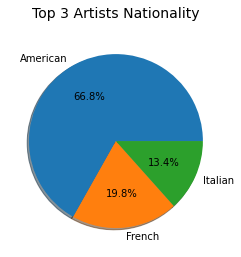

In [17]:
values = met_art['Artist Nationality'].value_counts()[:3].values
labels = met_art['Artist Nationality'].value_counts()[:3].index

plot_pie_chart(values, labels, "Top 3 Artists Nationality")

### Artist date of birth

In [ ]:
pd.to_numeric( )

TypeError: 'value' must be an instance of str or bytes, not a float

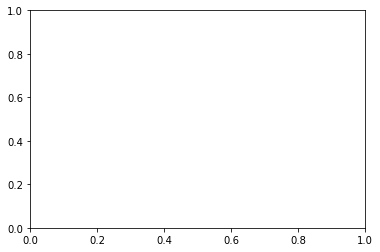

In [35]:
plt.hist(met_art[met_art['Artist Begin Date']!=0]['Artist Begin Date'])
plt.title('Number of Artists by Date of Birth')
plt.show()

### Top 10 artists with the most artworks

전체 56,390명의 작가가 있다

In [21]:
met_art['Artist Display Name'].describe()

count           261111
unique           56390
top       Walker Evans
freq              9659
Name: Artist Display Name, dtype: object

컬렉션 수가 가장 많은 10명의 작가들 중 Walker Evans의 작품이 9,659점으로 가장 많다

In [22]:
met_art['Artist Display Name'].value_counts()[:10]

Walker Evans                 9659
Kinney Brothers              4282
Allen & Ginter               3184
W. Duke, Sons & Co.          3148
Goodwin & Company            2747
Unknown                      2581
Brewster & Co.               2296
American Tobacco Company     1993
Bowman Gum Company           1992
Topps Chewing Gum Company    1232
Name: Artist Display Name, dtype: int64

/Users/jungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


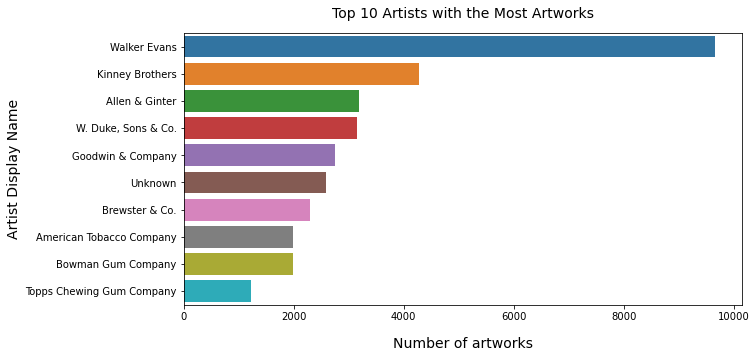

In [23]:
plot_bar_chart(met_art, column="Artist Display Name", title='Top 10 Artists with the Most Artworks')

## 6. Artworks

### Artworks in the public domain

절반 이상의 작품이 public domain이다

In [24]:
met_art['Is Public Domain'].value_counts()

False    246004
True     202199
Name: Is Public Domain, dtype: int64

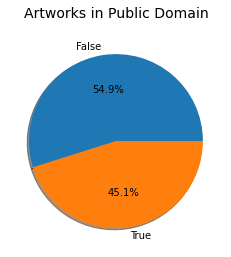

In [25]:
values = met_art['Is Public Domain'].value_counts()[:5].values
labels = met_art['Is Public Domain'].value_counts()[:5].index

plot_pie_chart(values, labels, "Artworks in Public Domain")

### Top artworks media

In [26]:
met_art['Medium'].value_counts()[:10]

Commercial color lithograph    20209
Etching                        15038
Albumen photograph             10389
Engraving                       9723
Gelatin silver print            8961
Silk                            8398
Terracotta                      7299
Bronze                          7265
Glass                           6665
Film negative                   6211
Name: Medium, dtype: int64

/Users/jungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


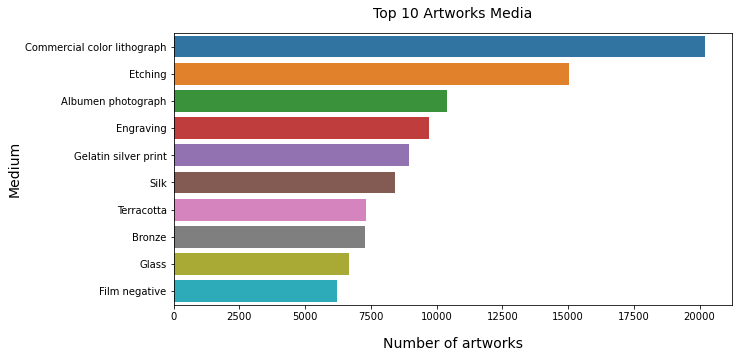

In [27]:
plot_bar_chart(met_art, column='Medium', title="Top 10 Artworks Media")

### Artworks by department

In [28]:
met_art['Department'].value_counts()

Drawings and Prints                          154445
European Sculpture and Decorative Arts        42528
Asian Art                                     36727
Photographs                                   36258
Costume Institute                             33681
Egyptian Art                                  27542
Greek and Roman Art                           17292
Islamic Art                                   15082
Modern and Contemporary Art                   13991
Arms and Armor                                13486
Arts of Africa, Oceania, and the Americas     12427
American Decorative Arts                      12330
Medieval Art                                   7343
Ancient Near Eastern Art                       6185
American Paintings and Sculpture               5451
Musical Instruments                            5303
European Paintings                             2760
The Cloisters                                  2628
Robert Lehman Collection                       2589
The Librarie

/Users/jungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


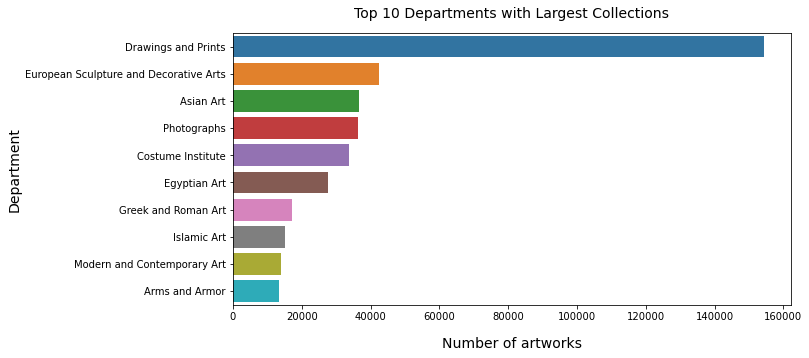

In [29]:
plot_bar_chart(met_art, column='Department', title="Top 10 Departments with Largest Collections")

### Top artworks classification

In [30]:
met_art['Classification'].value_counts()[:10]

Prints                  69260
Prints|Ephemera         30033
Photographs             26821
Drawings                25230
Books                   14685
Ceramics                13332
Paintings               11038
Textiles-Woven          10995
Photographs|Ephemera    10940
Glass                    8838
Name: Classification, dtype: int64

/Users/jungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


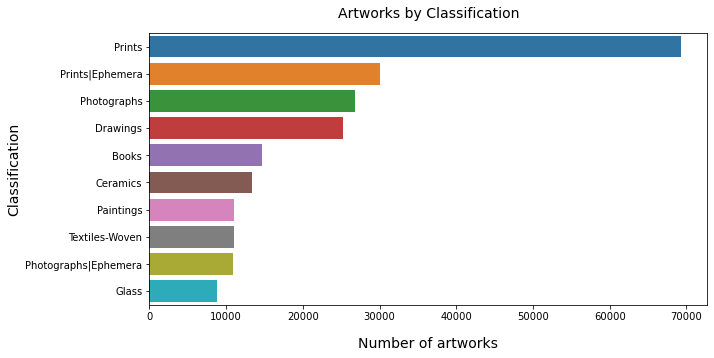

In [31]:
plot_bar_chart(met_art, column='Classification', title="Artworks by Classification")

### Artworks by country and culture

In [32]:
met_art['Country'].value_counts()[:10]

Egypt              30914
United States       8501
Iran                5886
Peru                3422
Byzantine Egypt     1673
France              1670
Mexico              1537
India               1440
Indonesia           1394
England             1059
Name: Country, dtype: int64

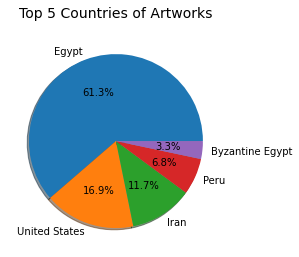

In [33]:
values = met_art['Country'].value_counts()[:5].values
labels = met_art['Country'].value_counts()[:5].index

plot_pie_chart(values, labels, "Top 5 Countries of Artworks")

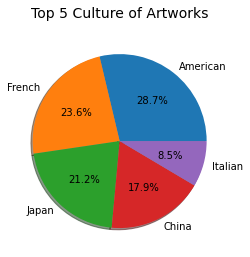

In [34]:
values = met_art['Culture'].value_counts()[:5].values
labels = met_art['Culture'].value_counts()[:5].index

plot_pie_chart(values, labels, "Top 5 Culture of Artworks")